In [1]:
hw_done = True    ## change this to True to mark your homework as done.

# Homework 4 
### Astrostatistics, University of Washington

## Problem 1

Assume we have a coin that has some probability $b$ of flipping to tails. That is, if the coin always flipped to tails, $b = 1$; if it always flipped to heads, $b = 0$; and if the coin were fair, $b = 0.5$.

### Likelihood

The likelihood function for a single coin toss returning heads or tails is:

$$
\begin{align}
p({\rm tails}\,|\,b) & = b \\
p({\rm heads}\,|\,b) & = 1-b
\end{align}
$$

If we define a variable $o$ which is $1$ if the outcome was tails, and 0 if it was heads, the above can be written compactly as:

$$ p(o\,|\,b) = b^o \cdot (1-b)^{1-o} $$

(which you can verify by inserting $o=1$ for tails and and $o=0$ for heads).

### Posterior

Following the Bayes theorem, the posterior for the parameter $b$ after every coin toss will be given by:

$$ p(b\,|\,o) = C \cdot p(o\,|\,b) \cdot p(b) $$

where $p(b)$ is our prior probability (our knowledge) of what $b$ was before the new coin toss. $C$ is the normalizing constant that makes sure the posterior integrates to 1.

### The problems

Get a coin (a real coin!), flip it 10 times, and record the results.

Assuming the initial prior probability $p(b) \propto {\rm const.}$ over the entire range of $b$:

1. Plot the posterior $p(b \,|\, o )$ after each flip. In every plot, also show the $p(b)$ before the toss (the prior).

2. After each flip, print the probability that your coin is approximately fair; that is, what is the probability 
   $p(0.4 < b < 0.6)$? 

3. After each flip, print the probability that your coin strongly prefers heads over tails; that is, what is the probability $p(b<0.25)$? 

Note #1: Don't forget to normalize your posteriors (i.e., compute and multiply by the factor $C$)! This is easily done numerically, for example:

```python
b = np.linspace(0,1,5000)
db = b[1]-b[0]

p = ... compute unnormalized posterior by multiplying likelihood and prior ...
C = 1. / (p * db).sum()  # Riemann sum with simple "rectangle rule"
p = C * p  # our normalized posterior
```

Hint: **Look at the lecture notes for similar computations!**

## Problem 2

Repeat the analysis of Problem 1, but starting with the [Jeffreys' prior](https://en.wikipedia.org/wiki/Jeffreys_prior):

$$ p(b) = b^{-0.5}(1-b)^{-0.5}$$

Discuss the difference in how the probabilities change with each coin toss, comparing them to what you obtained in Problem #1. How are they affected by the choice of initial prior? Is there a difference early on vs. after many flips?

Note: Jeffreys' prior is an [improper prior](https://en.wikipedia.org/wiki/Prior_probability#Improper_priors), with singularities (infinities) at $b=0$ and $b=1$. Therefore when you compute and plot it, choose a range some $\epsilon$ away from those (e.g., [0.00001, 0.99999], rather than a full range [0, 1]). Otherwise `numpy` and `matplotlib` will complain about infinities in plots where the Jeffreys prior shows up.

# Homework 4: Solutions

### Some useful definitions and functions

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=12, usetex=False)

## Problem 1: the coin toss

After flip 1: p(0.4 < b < 0.6) = 0.2000, p(b < 0.25) = 0.4375
After flip 2: p(0.4 < b < 0.6) = 0.1520, p(b < 0.25) = 0.5782
After flip 3: p(0.4 < b < 0.6) = 0.2961, p(b < 0.25) = 0.2616
After flip 4: p(0.4 < b < 0.6) = 0.3652, p(b < 0.25) = 0.1035
After flip 5: p(0.4 < b < 0.6) = 0.3652, p(b < 0.25) = 0.1694
After flip 6: p(0.4 < b < 0.6) = 0.4205, p(b < 0.25) = 0.0705
After flip 7: p(0.4 < b < 0.6) = 0.4205, p(b < 0.25) = 0.1137
After flip 8: p(0.4 < b < 0.6) = 0.4669, p(b < 0.25) = 0.0489
After flip 9: p(0.4 < b < 0.6) = 0.4669, p(b < 0.25) = 0.0781
After flip 10: p(0.4 < b < 0.6) = 0.5071, p(b < 0.25) = 0.0343


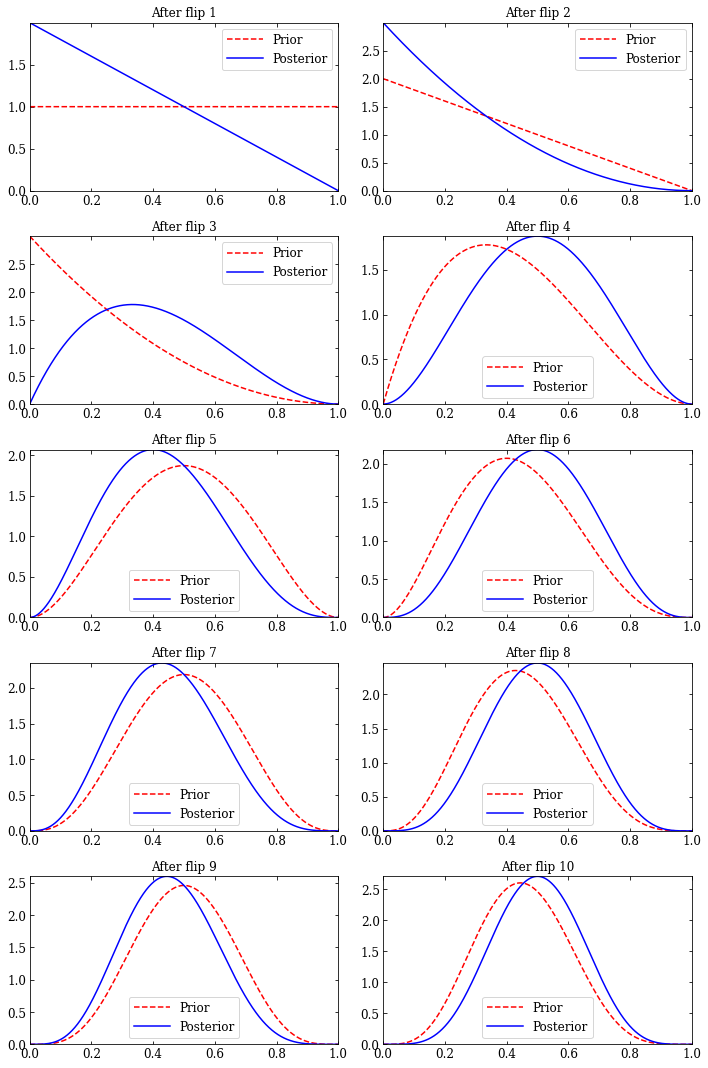

In [3]:
import numpy as np
import matplotlib.pyplot as plt

b = np.linspace(0,1,5000)
db = b[1]-b[0]
prior = np.ones_like(b)  
flipData = [0, 0, 1, 1, 0, 1, 0, 1, 0, 1]

plt.figure(figsize=(10, 15))

for i, flip in enumerate(flipData):
    likelihood = b**flip * (1-b)**(1-flip)
    unnormalized_posterior = likelihood * prior
    C = 1. / (unnormalized_posterior * db).sum()
    posterior = C * unnormalized_posterior
   

    plt.subplot(5, 2, i+1) 
    plt.plot(b, prior, 'r--', label='Prior')
    plt.plot(b, posterior, 'b-', label='Posterior')
    plt.title(f'After flip {i+1}')

    plt.legend()
    
    prior = posterior
    
    p_fair = posterior[(b > 0.4) & (b < 0.6)].sum() * db
    p_heads = posterior[b < 0.25].sum() * db
    print(f"After flip {i+1}: p(0.4 < b < 0.6) = {p_fair:.4f}, p(b < 0.25) = {p_heads:.4f}")

plt.tight_layout()
plt.show()


## Problem 2: reanalysis with the Jeffreys prior

Jeffereys prior is very flat in the beginning but eventually when the number of flip is high enough that artifact goes away
After flip 1: p(0.4 < b < 0.6) = 0.1334, p(b < 0.25) = 0.5937
After flip 2: p(0.4 < b < 0.6) = 0.0913, p(b < 0.25) = 0.7332
After flip 3: p(0.4 < b < 0.6) = 0.2530, p(b < 0.25) = 0.3332
After flip 4: p(0.4 < b < 0.6) = 0.3328, p(b < 0.25) = 0.1266
After flip 5: p(0.4 < b < 0.6) = 0.3328, p(b < 0.25) = 0.2093
After flip 6: p(0.4 < b < 0.6) = 0.3941, p(b < 0.25) = 0.0852
After flip 7: p(0.4 < b < 0.6) = 0.3942, p(b < 0.25) = 0.1384
After flip 8: p(0.4 < b < 0.6) = 0.4446, p(b < 0.25) = 0.0586
After flip 9: p(0.4 < b < 0.6) = 0.4446, p(b < 0.25) = 0.0941
After flip 10: p(0.4 < b < 0.6) = 0.4876, p(b < 0.25) = 0.0409


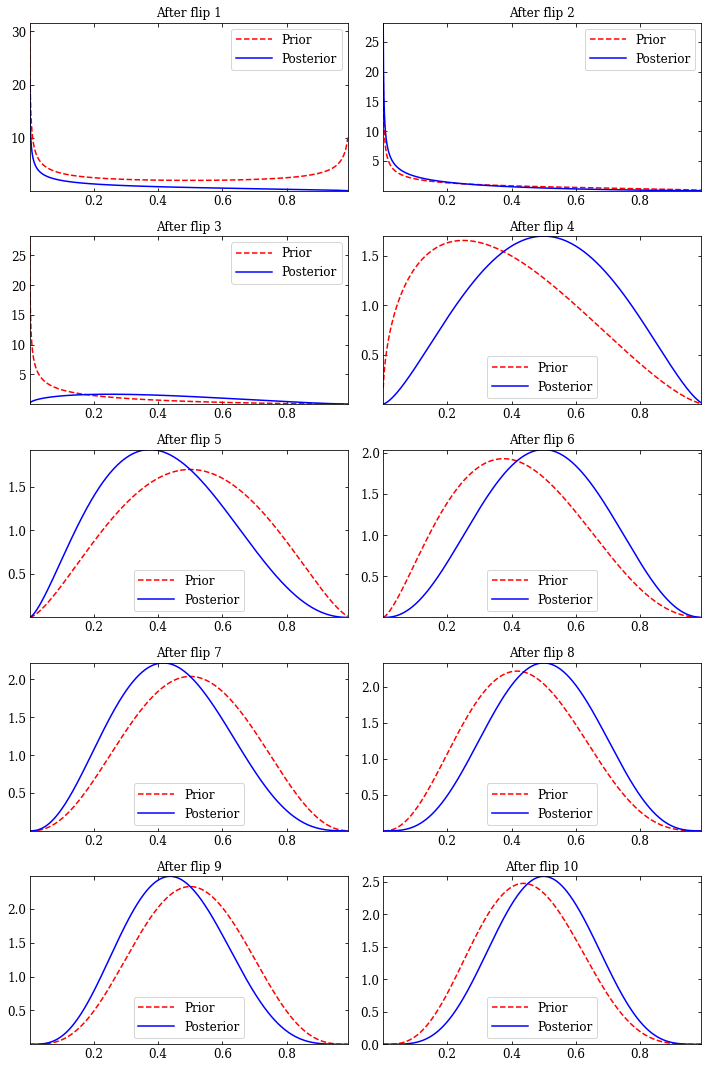

In [4]:
import numpy as np
import matplotlib.pyplot as plt

b = np.linspace(1e-3,.99,5000)
db = b[1]-b[0]
prior=[]
for i in range(0,len(b)):
    prior.append(b[i]**(-.5)*(1-b[i])**(-.5))

flipData = [0, 0, 1, 1, 0, 1, 0, 1, 0, 1]

plt.figure(figsize=(10, 15))

print('Jeffereys prior is very flat in the beginning but eventually when the number of flip is high enough that artifact goes away')

for i, flip in enumerate(flipData):
    likelihood = b**flip * (1-b)**(1-flip)
    unnormalized_posterior = likelihood * prior
    C = 1. / (unnormalized_posterior * db).sum()
    posterior = C * unnormalized_posterior
   

    plt.subplot(5, 2, i+1) 
    plt.plot(b, prior, 'r--', label='Prior')
    plt.plot(b, posterior, 'b-', label='Posterior')
    plt.title(f'After flip {i+1}')

    plt.legend()
    
    prior = posterior
    
    p_fair = posterior[(b > 0.4) & (b < 0.6)].sum() * db
    p_heads = posterior[b < 0.25].sum() * db
    print(f"After flip {i+1}: p(0.4 < b < 0.6) = {p_fair:.4f}, p(b < 0.25) = {p_heads:.4f}")

plt.tight_layout()
plt.show()



Don't forget to comment on the results, as asked in the problem statement!